In [1]:
include("src/qsrfe.jl")
using .qsrfe

using DataFrames, MLJ, MLJLinearModels
using LinearAlgebra
using Plots

In [2]:
bX, bY = @load_boston
bX = Matrix(DataFrame(bX))
bY = collect(bY)
bX

bX = (bX .- mean(bX)) ./ std(bX)
Y = (bY .- mean(bY)) ./ std(bY)
(xtrain, xtest), (ytrain, ytest) = partition((bX, bY), 0.8, rng=123, multi=true)

(([-0.5038479125622459 -0.3736555203370192 … 2.078229709420622 -0.467825129690138; -0.501959374129676 -0.5073242348197996 … 1.4241218550991361 -0.42919487120461447; … ; -0.5071204568645706 -0.13973526999215344 … 2.0856483230744165 -0.4765135961315187; -0.45784081189620396 -0.5073242348197996 … 1.595551981423302 -0.3308815317025295], [-0.507019470150779 -0.5073242348197996 … 2.117929317622008 -0.4170310181866815; -0.438932637054685 -0.5073242348197996 … 2.0303763096357867 -0.38682188871357304; … ; -0.20158311583976354 -0.5073242348197996 … 0.08262263654995178 -0.2601707817411386; -0.5037144443508349 -0.3736555203370192 … 2.117929317622008 -0.4432300862253064]), ([48.8, 20.2, 20.9, 13.4, 12.7, 13.6, 22.1, 24.4, 13.3, 20.3  …  36.2, 20.7, 42.3, 5.0, 18.7, 19.6, 17.9, 41.7, 31.2, 17.2], [23.3, 14.6, 32.0, 22.6, 14.1, 19.1, 20.3, 12.6, 50.0, 24.8  …  22.2, 19.8, 31.7, 27.1, 19.5, 24.6, 15.6, 26.4, 7.0, 33.8]))

In [29]:
N = 10000
ω, ζ = gen_weights(N,size(xtrain,2));

In [30]:
A = compute_featuremap(xtrain,ω,rff,ζ)
T = compute_featuremap(xtest,ω,rff,ζ)
ridge = RidgeRegression(0.001; fit_intercept=true) #if intercept is true, the last element of c is the intercept
#solver = FISTA(max_iter=20000)
c = MLJLinearModels.fit(ridge,A,ytrain);


In [31]:
ypred_srfe = hcat(T,ones(size(T,1))) * c
ytrain_srfe = hcat(A,ones(size(A,1))) * c

test_metrics(ytest,ypred_srfe,ytrain,ytrain_srfe)

MSE: 7.7918664614053 train MSE: 6.460823056152397
rel: 0.0934077966600748 train rel: 0.09006710864467897


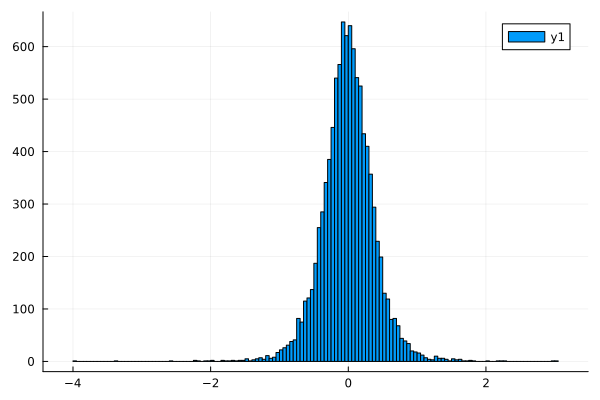

In [32]:
histogram(c[1:(length(c)-1)])

In [35]:
Matrix(1) / [2 0; 0 2]

MethodError: MethodError: no method matching (Matrix)(::Int64)
Closest candidates are:
  (Matrix)(!Matched::Union{QR, LinearAlgebra.QRCompactWY}) at C:\Users\grsbe\AppData\Local\Programs\Julia-1.7.3\share\julia\stdlib\v1.7\LinearAlgebra\src\qr.jl:441
  (Matrix)(!Matched::PDMats.PDSparseMat) at C:\Users\grsbe\.julia\packages\PDMats\CbBv1\src\pdsparsemat.jl:32
  (Matrix)(!Matched::PDMats.PDMat) at C:\Users\grsbe\.julia\packages\PDMats\CbBv1\src\pdmat.jl:32
  ...